# VARHCPC

In [1]:
#changement de dossier
import os
os.chdir("d:/Bureau/PythonProject/packages/scientisttools/data/")

#importation des données
import pandas as pd
vote = pd.read_excel("vote_clustering.xlsx")
vote.head()

,affiliation,budget,physician,salvador,nicaraguan,missile,education
0,republican,n,y,y,n,n,y
1,republican,n,y,y,n,n,y
2,democrat,y,neither,y,n,n,n
3,democrat,y,n,neither,n,n,n
4,democrat,y,n,y,n,n,neither


In [2]:
#variables actives
X = vote.iloc[:,1:]
print(X.columns)

Index(['budget', 'physician', 'salvador', 'nicaraguan', 'missile',
       'education'],
      dtype='object')


## ACM sur les données actives

In [3]:
# ACM
from scientisttools.decomposition import MCA

my_mca = MCA(n_components=2,
             row_labels=X.index,
             var_labels=X.columns,
             mod_labels=None,
             matrix_type="completed",
             benzecri=True,
             greenacre=True,
             row_sup_labels=None,
             quali_sup_labels=None,
             quanti_sup_labels=None,
            parallelize=False)
my_mca.fit(X)

MCA(n_components=2, row_labels=RangeIndex(start=0, stop=435, step=1),
    var_labels=Index(['budget', 'physician', 'salvador', 'nicaraguan', 'missile',
       'education'],
      dtype='object'))

In [4]:
# Coordonnées des modalités
pd.DataFrame(my_mca.mod_coord_,index=my_mca.mod_labels_,columns=my_mca.dim_index_)

,Dim.1,Dim.2
budget_n,-1.036268,0.122848
budget_neither,0.144353,-4.493302
budget_y,0.694127,0.112329
physician_n,0.742239,0.123821
physician_neither,0.382880,-4.489729
physician_y,-1.059575,0.106234
salvador_n,0.918398,0.152289
salvador_neither,0.305731,-3.222448
salvador_y,-0.922701,0.078588
nicaraguan_n,-1.036804,0.098726


In [5]:
pd.DataFrame(my_mca.mod_infos_,index=my_mca.mod_labels_,columns=["dist","weight","Inertie"])

,dist,weight,Inertie
budget_n,1.242521,0.065517,0.101149
budget_neither,6.208499,0.004215,0.162452
budget_y,0.848155,0.096935,0.069732
physician_n,0.872430,0.094636,0.072031
physician_neither,6.208499,0.004215,0.162452
physician_y,1.207322,0.067816,0.098851
salvador_n,1.044675,0.079693,0.086973
salvador_neither,5.291503,0.005747,0.160920
salvador_y,1.025615,0.081226,0.085441
nicaraguan_n,1.201591,0.068199,0.098467


> Note

Dans ce tableau `weight` représente le poids relatif de chaque modalité, c'est - à - dire :

$$
w_{k} = \dfrac{n_{k}}{n\times p}
$$

où 
* $n_{k}$ est le nombre d'individu possédant la modalité $k$
* $n$ le nombre total d'individu
* $p$ le nombre de variables catégorielles

Dans le cadre de la classification automatique, on utilise le poids absolu (ou proportion), c'est - à - dire :

$$
p_{k} = \dfrac{n_{k}}{n} = w_{k}\times p
$$

In [6]:
# Poids absolus des modalités
my_mca.mod_infos_[:,1]*my_mca.n_vars_

array([0.39310345, 0.02528736, 0.5816092 , 0.56781609, 0.02528736,
       0.40689655, 0.47816092, 0.03448276, 0.48735632, 0.4091954 ,
       0.03448276, 0.55632184, 0.47356322, 0.05057471, 0.47586207,
       0.53563218, 0.07126437, 0.39310345])

## Classification automatique

In [7]:
from scientisttools.clustering import VARHCPC

In [8]:
# 
varhcpc = VARHCPC(n_clusters=3,
                  metric="euclidean",
                  method="average",
                  parallelize=False)
# Instanciation
varhcpc.fit(my_mca)

VARHCPC(method='average', n_clusters=3)

### Dendrogram

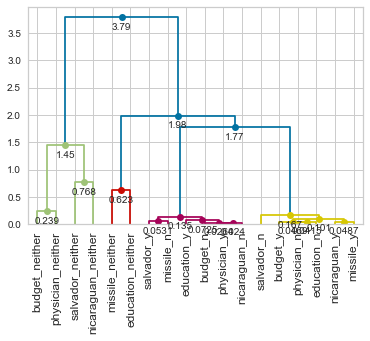

In [9]:
# Dendrogram
import matplotlib.pyplot as plt
from scientisttools.pyplot import plot_dendrogram

plot_dendrogram(varhcpc,orientation='top',leaf_rotation=90,color_threshold=1.6)
plt.show()

In [10]:
varhcpc.cluster_centers_

,Dim.1,Dim.2
cluster,,
cluster_1,-0.005715,0.111920
cluster_2,0.072444,-3.707536
cluster_3,0.199041,-1.652219


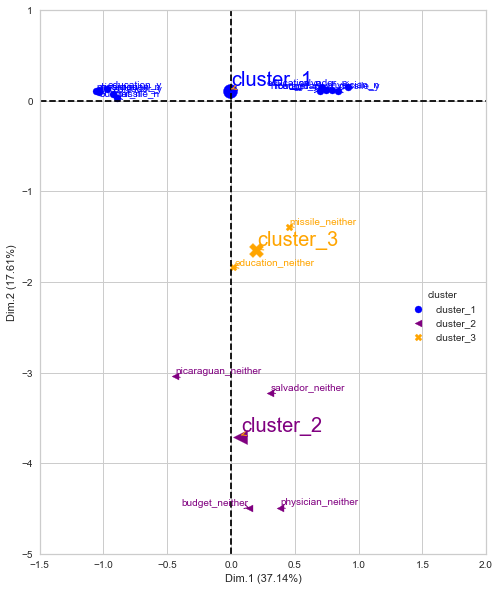

In [11]:
from scientisttools.pyplot import plotVARHCPC

fig,axe =plt.subplots(figsize=(10,10))
plotVARHCPC(varhcpc,ax=axe,xlim=(-1.5,2),ylim=(-5,1),repel=True,random_state=123,show_clust_cent=True)
plt.show()